In [1]:
import gym
import numpy as np

import time

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [3]:
import matplotlib.pyplot as plt

In [4]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [5]:
import torch

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env

In [8]:
from utils.notifications import Slack

In [9]:
import copy

# Setup

In [10]:
env_name = 'Taxi-v2'
#env_name = 'Breakout-ram-v0'

In [11]:
environment = env.Environment(
    environment=gym.make(env_name), 
    agent=None,
    verbose=True,
    max_steps=200,
    capacity=100,
    representation_method='one_hot_encoding'
)

/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [12]:
model = linears.Linear(
    input_dimension=environment.get_input_dimension(), 
    n_actions=environment.n_actions,
    bias=False
)

#optimiser = torch.optim.Adam(model.parameters(), lr=.5)
optimiser = torch.optim.SGD(model.parameters(), lr=1., momentum=0)

agent = agents.DQNAgent(
    model,
    optimiser, 
    gamma=1., 
    temperature=10, 
    algorithm='sarsa', 
    n_actions=environment.n_actions,
    use_double_learning=False,
    terminal_state=environment.max_obs
)

environment.agent = agent

In [30]:
print(environment.agent.q(environment.state_representation(479)))
model.load_state_dict(torch.load('../saved/taxi/mlp/state_dict.pth'))
agent.commit()
print(environment.agent.q(environment.state_representation(479)))

[-0.00846342 -0.00302833 -0.00997378 -0.00963682  0.0334117   0.01260518]
[-2.7755716 -4.6213636 -3.6307092 -3.5357807 -4.614105   2.954819 ]


# Experiment

## Training

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

tensor([-4.3966, -4.0845, -3.4694, -3.9701, -2.4942, -0.6009],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 10%|######4                                                         | 1/10 [00:04<00:40,  4.54s/it]

tensor([-4.3966, -4.0845, -3.4694, -3.9701, -2.4942, -0.1889],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 20%|############8                                                   | 2/10 [00:08<00:35,  4.40s/it]

tensor([-4.3966, -4.0845, -3.4694, -3.9701, -2.4942,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-9.1153183 -9.1153183 -9.1153183 -9.1153183 -9.1153183 -9.1153183]
1
tensor([-4.3966, -4.1851, -3.4694, -3.9701, -2.4942,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-13.4694066 -13.4694066 -13.4694066 -13.4694066 -13.4694066 -13.4694066]
4
tensor([-4.3966, -4.1851, -3.4694, -3.9701, -2.7137,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-10.11841583 -10.11841583 -10.11841583 -10.11841583 -10.11841583
 -10.11841583]
1
tensor([-4.3966, -4.3038, -3.4694, -3.9701, -2.7137,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-5.26818943 -5.26818943 -5.26818943 -5.26818943 -5.26818943 -5.26818943]
2
tensor([-4.3966, -4.3038, -3.5054, -3.9701, -2.7137,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-4.4694066 -4.4694066 -4.4694066 -4.4694066 -4.4694066 -4.4694066]
3
tensor([-4.3966, -4.3038, -3.5054, -3.9801, -2.7137,  0.2149],
       grad_fn=<SqueezeBackward3>)
[-5.26818943 -5.26818943 -5.26818943 

 30%|###################2                                            | 3/10 [00:12<00:28,  4.14s/it]

tensor([-4.3966, -4.3038, -3.5752, -3.9801, -2.7137,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-7.87527418 -7.87527418 -7.87527418 -7.87527418 -7.87527418 -7.87527418]
1
tensor([-4.3966, -4.3752, -3.5752, -3.9801, -2.7137,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-14.30377388 -14.30377388 -14.30377388 -14.30377388 -14.30377388
 -14.30377388]
4
tensor([-4.3966, -4.3752, -3.5752, -3.9801, -2.9455,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-7.87527418 -7.87527418 -7.87527418 -7.87527418 -7.87527418 -7.87527418]
1
tensor([-4.3966, -4.4452, -3.5752, -3.9801, -2.9455,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-5.3535924 -5.3535924 -5.3535924 -5.3535924 -5.3535924 -5.3535924]
2
tensor([-4.3966, -4.4452, -3.6108, -3.9801, -2.9455,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-5.39663029 -5.39663029 -5.39663029 -5.39663029 -5.39663029 -5.39663029]
3
tensor([-4.3966, -4.4452, -3.6108, -4.0084, -2.9455,  0.6106],
       grad_fn=<SqueezeBackward3>)
[-9.57649708 -9.57649708 -9.576

 40%|#########################6                                      | 4/10 [00:16<00:25,  4.31s/it]

tensor([-4.2226, -4.5438, -3.8185, -4.0084, -3.5026,  1.3784],
       grad_fn=<SqueezeBackward3>)
[-13.5025804 -13.5025804 -13.5025804 -13.5025804 -13.5025804 -13.5025804]
4
tensor([-4.2226, -4.5438, -3.8185, -4.0084, -3.7026,  1.3784],
       grad_fn=<SqueezeBackward3>)
[-9.45292664 -9.45292664 -9.45292664 -9.45292664 -9.45292664 -9.45292664]
1
tensor([-4.2226, -4.6420, -3.8185, -4.0084, -3.7026,  1.3784],
       grad_fn=<SqueezeBackward3>)
[-6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422]
2
tensor([-4.2226, -4.6420, -3.8766, -4.0084, -3.7026,  1.3784],
       grad_fn=<SqueezeBackward3>)
[0.37842357 0.37842357 0.37842357 0.37842357 0.37842357 0.37842357]
0
tensor([-4.1306, -4.6420, -3.8766, -4.0084, -3.7026,  1.3784],
       grad_fn=<SqueezeBackward3>)
[-8.62157643 -8.62157643 -8.62157643 -8.62157643 -8.62157643 -8.62157643]
4
tensor([-4.1306, -4.6420, -3.8766, -4.0084, -3.8010,  1.3784],
       grad_fn=<SqueezeBackward3>)
[-8.62157643 -8.62157643 -8.62157643 -

 50%|################################                                | 5/10 [00:20<00:20,  4.07s/it]

tensor([-4.1481, -4.6420, -3.8766, -4.0411, -3.8974,  2.1158],
       grad_fn=<SqueezeBackward3>)
[1.11583805 1.11583805 1.11583805 1.11583805 1.11583805 1.11583805]
3
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -3.8974,  2.1158],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -3.8974,  2.4735],
       grad_fn=<SqueezeBackward3>)
[-7.52647877 -7.52647877 -7.52647877 -7.52647877 -7.52647877 -7.52647877]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -3.9700,  2.4735],
       grad_fn=<SqueezeBackward3>)
[-13.89737272 -13.89737272 -13.89737272 -13.89737272 -13.89737272
 -13.89737272]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.1685,  2.4735],
       grad_fn=<SqueezeBackward3>)
[-13.87659669 -13.87659669 -13.87659669 -13.87659669 -13.87659669
 -13.87659669]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.3627,  2.4735],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 60%|######################################4                         | 6/10 [00:23<00:15,  3.94s/it]

tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.3627,  2.8241],
       grad_fn=<SqueezeBackward3>)
[-13.87659669 -13.87659669 -13.87659669 -13.87659669 -13.87659669
 -13.87659669]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.5529,  2.8241],
       grad_fn=<SqueezeBackward3>)
[-14.64197397 -14.64197397 -14.64197397 -14.64197397 -14.64197397
 -14.64197397]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.7547,  2.8241],
       grad_fn=<SqueezeBackward3>)
[-14.14812422 -14.14812422 -14.14812422 -14.14812422 -14.14812422
 -14.14812422]
4
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.9426,  2.8241],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.1481, -4.6420, -3.8766, -3.9380, -4.9426,  3.1676],
       grad_fn=<SqueezeBackward3>)
[-6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422]
2
tensor([-4.1481, -4.6420, -3.9336, -3.9380, -4.9426,  3.1676],
       grad_fn=<SqueezeBackward3>)
[-5.64197397 -5.64197397 -5.64197397 -5.64197397 -5.6419739

 70%|############################################8                   | 7/10 [00:27<00:11,  3.90s/it]

tensor([-4.1780, -4.7077, -3.9336, -3.9380, -4.9426,  3.5042],
       grad_fn=<SqueezeBackward3>)
[-6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422 -6.72502422]
2
tensor([-4.1780, -4.7077, -3.9894, -3.9380, -4.9426,  3.5042],
       grad_fn=<SqueezeBackward3>)
[2.50421858 2.50421858 2.50421858 2.50421858 2.50421858 2.50421858]
0
tensor([-4.0444, -4.7077, -3.9894, -3.9380, -4.9426,  3.5042],
       grad_fn=<SqueezeBackward3>)
[-7.93000269 -7.93000269 -7.93000269 -7.93000269 -7.93000269 -7.93000269]
1
tensor([-4.0444, -4.7722, -3.9894, -3.9380, -4.9426,  3.5042],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 80%|###################################################2            | 8/10 [00:31<00:07,  3.92s/it]

tensor([-4.0444, -4.7722, -3.9894, -3.9380, -4.9426,  3.8341],
       grad_fn=<SqueezeBackward3>)
[-5.04435682 -5.04435682 -5.04435682 -5.04435682 -5.04435682 -5.04435682]
3
tensor([-4.0444, -4.7722, -3.9894, -3.9601, -4.9426,  3.8341],
       grad_fn=<SqueezeBackward3>)
[-6.42450333 -6.42450333 -6.42450333 -6.42450333 -6.42450333 -6.42450333]
1
tensor([-4.0444, -4.8052, -3.9894, -3.8242, -4.9426,  3.8341],
       grad_fn=<SqueezeBackward3>)
[-5.04435682 -5.04435682 -5.04435682 -5.04435682 -5.04435682 -5.04435682]
3
tensor([-4.0444, -4.8052, -3.9894, -3.8486, -4.9426,  3.8341],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 90%|#########################################################6      | 9/10 [00:35<00:03,  3.73s/it]

tensor([-4.0444, -4.8052, -3.9894, -3.8486, -4.9426,  4.4808],
       grad_fn=<SqueezeBackward3>)
[-5.80522633 -5.80522633 -5.80522633 -5.80522633 -5.80522633 -5.80522633]
3
tensor([-4.0444, -4.8052, -3.9894, -3.8877, -4.9426,  4.4808],
       grad_fn=<SqueezeBackward3>)
[-12.94105625 -12.94105625 -12.94105625 -12.94105625 -12.94105625
 -12.94105625]
1
tensor([-4.0444, -4.9679, -3.9894, -3.7404, -4.9426,  4.4808],
       grad_fn=<SqueezeBackward3>)
[3.48076868 3.48076868 3.48076868 3.48076868 3.48076868 3.48076868]
3
tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  4.4808],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  5.1015],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:38<00:00,  3.71s/it]

tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  5.3995],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


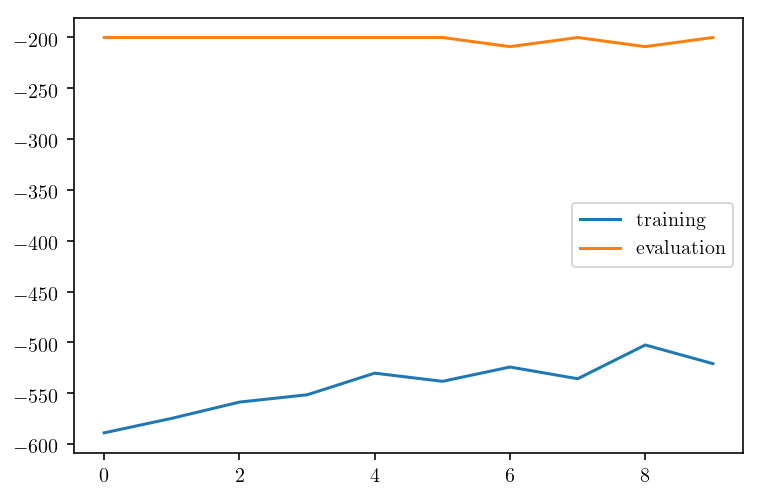

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-17.790901 -16.880358 -18.09406  -17.297537 -15.408881 -22.678102]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-4.044357  -4.9679427 -3.9893944 -3.5959446 -4.9425926  5.6915174]


 10%|######4                                                         | 1/10 [00:03<00:28,  3.12s/it]

tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  5.6915],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  5.9777],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  6.2581],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 20%|############8                                                   | 2/10 [00:06<00:25,  3.14s/it]

tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  6.5330],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 40%|#########################6                                      | 4/10 [00:13<00:20,  3.38s/it]

tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  6.8023],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 50%|################################                                | 5/10 [00:17<00:17,  3.47s/it]

tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  7.0663],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -4.9679, -3.9894, -3.5959, -4.9426,  7.3249],
       grad_fn=<SqueezeBackward3>)
[-5.67129707 -5.67129707 -5.67129707 -5.67129707 -5.67129707 -5.67129707]
1
tensor([-4.0444, -4.9820, -3.9894, -3.5959, -4.9426,  7.3249],
       grad_fn=<SqueezeBackward3>)
[-2.67506075 -2.67506075 -2.67506075 -2.67506075 -2.67506075 -2.67506075]
4
tensor([-4.0444, -4.9820, -3.9894, -3.5959, -4.8972,  7.3249],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 60%|######################################4                         | 6/10 [00:21<00:14,  3.63s/it]

tensor([-4.0444, -4.9820, -3.9894, -3.5959, -4.8972,  7.5784],
       grad_fn=<SqueezeBackward3>)
[-9.57157612 -9.57157612 -9.57157612 -9.57157612 -9.57157612 -9.57157612]
1
tensor([-4.0444, -5.0738, -3.9894, -3.5959, -4.8972,  7.5784],
       grad_fn=<SqueezeBackward3>)
[-14.04435682 -14.04435682 -14.04435682 -14.04435682 -14.04435682
 -14.04435682]
4
tensor([-4.0444, -5.0738, -3.9894, -3.5959, -5.0802,  7.5784],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 70%|############################################8                   | 7/10 [00:24<00:10,  3.46s/it]

tensor([-4.0444, -5.0738, -3.9894, -3.5959, -5.0802,  7.8269],
       grad_fn=<SqueezeBackward3>)
[-6.07380104 -6.07380104 -6.07380104 -6.07380104 -6.07380104 -6.07380104]
3
tensor([-4.0444, -5.0738, -3.9894, -3.6455, -5.0802,  7.8269],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 80%|###################################################2            | 8/10 [00:27<00:06,  3.40s/it]

tensor([-4.0444, -5.0738, -3.9894, -3.6455, -5.0802,  8.3138],
       grad_fn=<SqueezeBackward3>)
[7.313797 7.313797 7.313797 7.313797 7.313797 7.313797]
3
tensor([-4.0444, -5.0738, -3.9894, -3.4263, -5.0802,  8.3138],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -5.0738, -3.9894, -3.4263, -5.0802,  8.7812],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 90%|#########################################################6      | 9/10 [00:30<00:03,  3.33s/it]

tensor([-4.0444, -5.0738, -3.9894, -3.4263, -5.0802,  9.0056],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-4.0444, -5.0738, -3.9894, -3.4263, -5.0802,  9.2255],
       grad_fn=<SqueezeBackward3>)
[8.22550774 8.22550774 8.22550774 8.22550774 8.22550774 8.22550774]
3
tensor([-4.0444, -5.0738, -3.9894, -3.1933, -5.0802,  9.2255],
       grad_fn=<SqueezeBackward3>)
[8.22550774 8.22550774 8.22550774 8.22550774 8.22550774 8.22550774]
0
tensor([-3.7990, -5.1712, -3.9894, -3.1933, -5.0802,  9.2255],
       grad_fn=<SqueezeBackward3>)
[-0.77449226 -0.77449226 -0.77449226 -0.77449226 -0.77449226 -0.77449226]
4
tensor([-3.7990, -5.1712, -3.9894, -3.1933, -4.9941,  9.2255],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:33<00:00,  3.29s/it]

tensor([-3.7990, -5.1712, -3.9894, -3.1933, -4.9941,  9.4410],
       grad_fn=<SqueezeBackward3>)
[-4.98939443 -4.98939443 -4.98939443 -4.98939443 -4.98939443 -4.98939443]
3
tensor([-3.7990, -5.1712, -3.9894, -3.2292, -4.9941,  9.4410],
       grad_fn=<SqueezeBackward3>)
[-9.96648407 -9.96648407 -9.96648407 -9.96648407 -9.96648407 -9.96648407]
1
tensor([-3.8190, -5.2671, -3.9894, -3.2292, -4.9941,  9.4410],
       grad_fn=<SqueezeBackward3>)
[-0.55900288 -0.55900288 -0.55900288 -0.55900288 -0.55900288 -0.55900288]
4
tensor([-3.8190, -5.2671, -3.9894, -3.2292, -4.9054,  9.4410],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


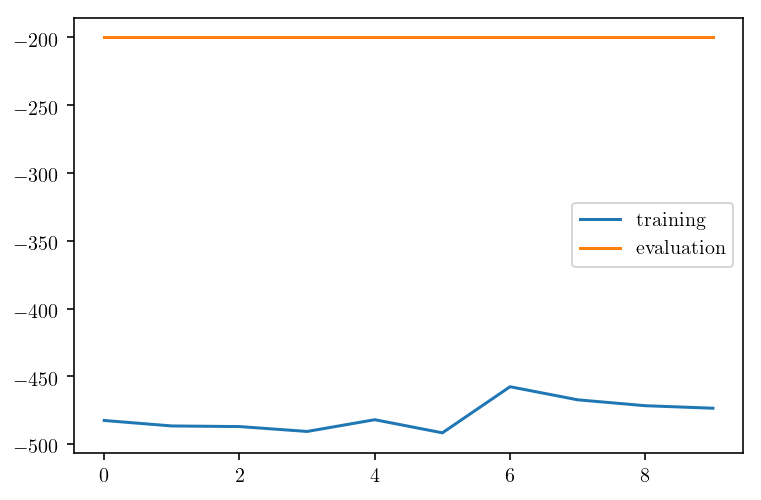

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-19.252775 -18.117863 -18.58868  -18.689007 -16.084904 -23.924488]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.8189595 -5.267123  -3.9893944 -3.2292016 -4.9053693  9.652177 ]


 20%|############8                                                   | 2/10 [00:06<00:25,  3.21s/it]

tensor([-3.8190, -5.2671, -3.9894, -3.2292, -4.9054,  9.6522],
       grad_fn=<SqueezeBackward3>)
[-0.34782314 -0.34782314 -0.34782314 -0.34782314 -0.34782314 -0.34782314]
4
tensor([-3.8190, -5.2671, -3.9894, -3.2292, -4.8142,  9.6522],
       grad_fn=<SqueezeBackward3>)
[8.65217686 8.65217686 8.65217686 8.65217686 8.65217686 8.65217686]
0
tensor([-3.5695, -5.2671, -3.9894, -3.2292, -4.8142,  9.6522],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 30%|###################2                                            | 3/10 [00:10<00:23,  3.31s/it]

tensor([-3.5695, -5.2671, -3.9894, -3.2292, -4.8142,  9.8591],
       grad_fn=<SqueezeBackward3>)
[-0.14086628 -0.14086628 -0.14086628 -0.14086628 -0.14086628 -0.14086628]
4
tensor([-3.5695, -5.2671, -3.9894, -3.2292, -4.7208,  9.8591],
       grad_fn=<SqueezeBackward3>)
[8.85913372 8.85913372 8.85913372 8.85913372 8.85913372 8.85913372]
0
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208,  9.8591],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 70%|############################################8                   | 7/10 [00:22<00:09,  3.14s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 10.0620],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 80%|###################################################2            | 8/10 [00:25<00:06,  3.05s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 10.2607],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 10.4555],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 90%|#########################################################6      | 9/10 [00:28<00:03,  3.02s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 10.6464],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:31<00:00,  3.07s/it]


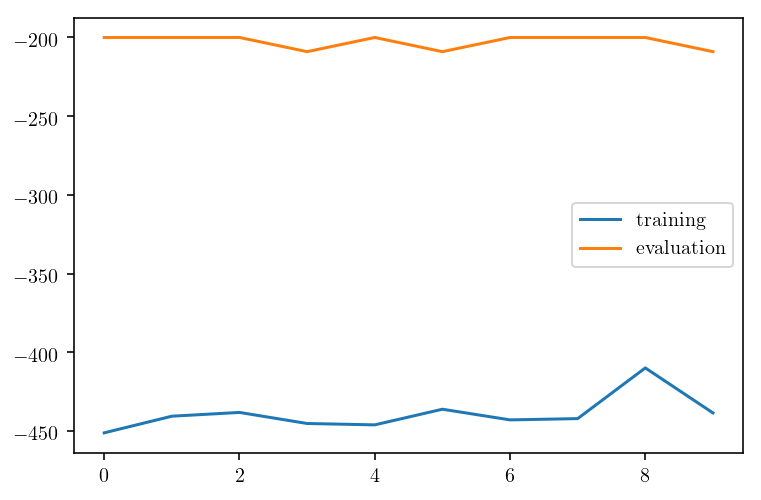

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-20.597383 -18.480581 -19.947878 -19.163263 -16.517439 -25.40428 ]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 10.83346  ]


 50%|################################                                | 5/10 [00:15<00:15,  3.11s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 10.8335],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 60%|######################################4                         | 6/10 [00:18<00:12,  3.01s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.0168],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 90%|#########################################################6      | 9/10 [00:26<00:02,  2.89s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.1965],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.3725],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:29<00:00,  2.95s/it]


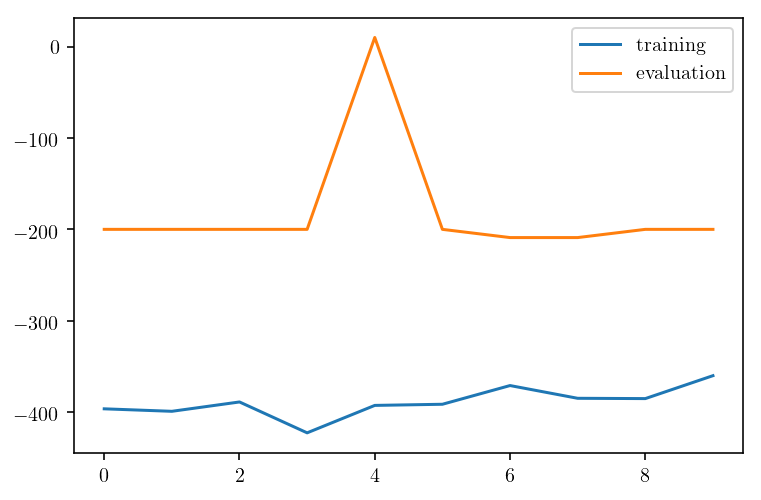

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-21.353086 -19.391235 -20.79567  -19.84423  -16.964556 -26.301199]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 11.545075 ]


 20%|############8                                                   | 2/10 [00:05<00:22,  2.86s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.5451],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 30%|###################2                                            | 3/10 [00:08<00:19,  2.82s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.7142],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:24<00:00,  2.44s/it]


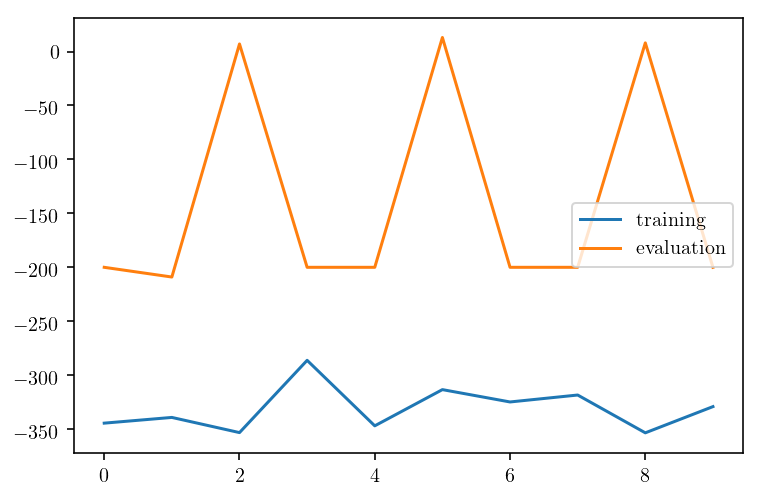

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-22.023743 -19.98445  -21.348541 -20.589315 -17.367842 -26.710339]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 11.87989  ]


 20%|############8                                                   | 2/10 [00:04<00:16,  2.12s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 11.8799],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.0423],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 60%|######################################4                         | 6/10 [00:13<00:08,  2.16s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.2014],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.3574],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.5103],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 70%|############################################8                   | 7/10 [00:15<00:06,  2.28s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.6601],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 80%|###################################################2            | 8/10 [00:17<00:04,  2.29s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.8069],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 12.9507],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:22<00:00,  2.29s/it]


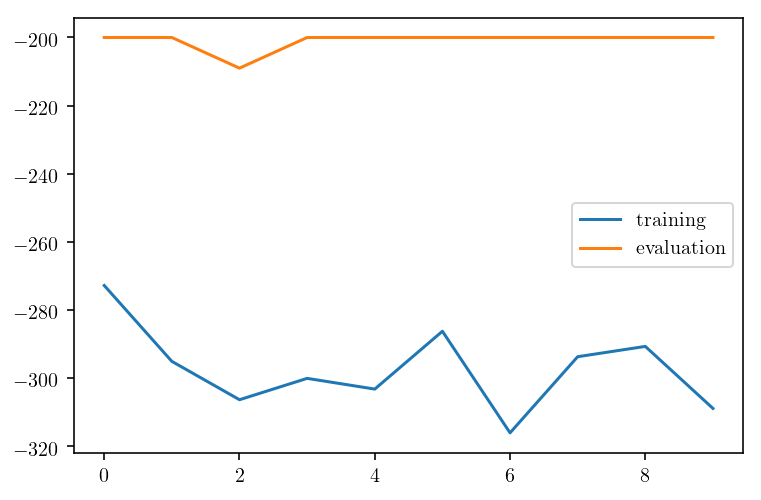

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-22.262516 -20.51787  -21.844578 -20.766209 -17.81522  -27.078281]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 13.091712 ]


 50%|################################                                | 5/10 [00:11<00:11,  2.34s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.0917],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.2299],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 70%|############################################8                   | 7/10 [00:15<00:06,  2.20s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.3653],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.4980],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:22<00:00,  2.13s/it]


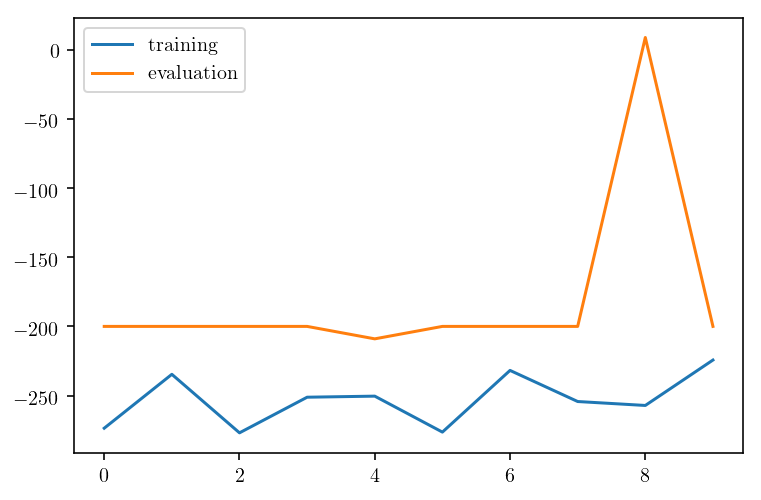

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-22.516277 -20.62368  -22.47895  -20.970665 -17.73867  -27.277206]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 13.628015 ]


 60%|######################################4                         | 6/10 [00:12<00:08,  2.04s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.6280],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.7555],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 70%|############################################8                   | 7/10 [00:14<00:06,  2.05s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 13.8803],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 14.0027],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


 90%|#########################################################6      | 9/10 [00:18<00:01,  1.96s/it]

tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 14.1227],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5
tensor([-3.3210, -5.2671, -3.9894, -3.2292, -4.7208, 14.2402],
       grad_fn=<SqueezeBackward3>)
[20. 20. 20. 20. 20. 20.]
5


100%|###############################################################| 10/10 [00:20<00:00,  1.99s/it]


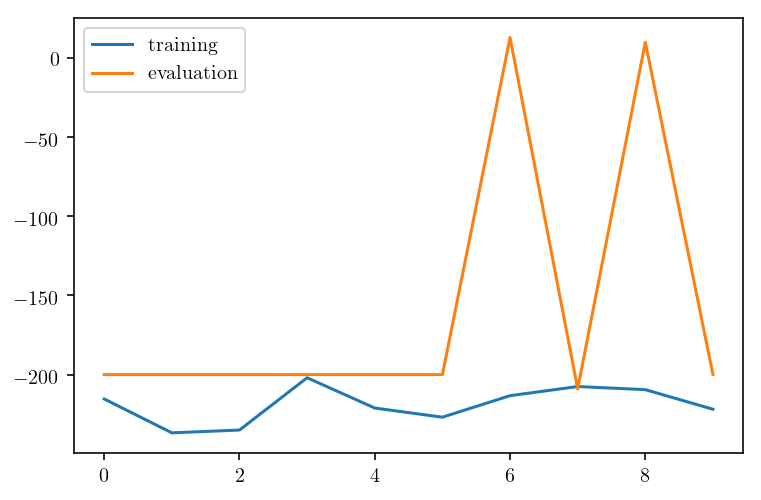

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-23.262186 -21.189346 -22.74141  -21.139835 -17.732098 -27.613888]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 14.355425 ]


100%|###############################################################| 10/10 [00:17<00:00,  1.77s/it]


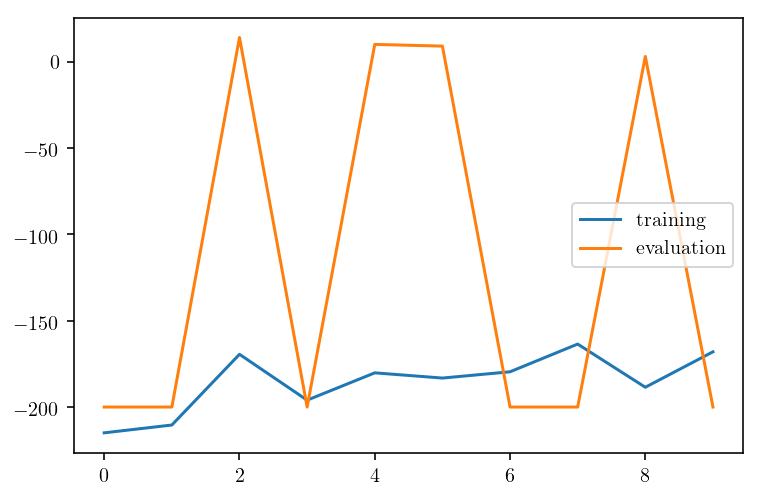

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

[-23.485743 -21.361599 -22.891172 -20.97959  -18.042206 -27.613888]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 14.355425 ]


100%|###############################################################| 10/10 [00:16<00:00,  1.67s/it]


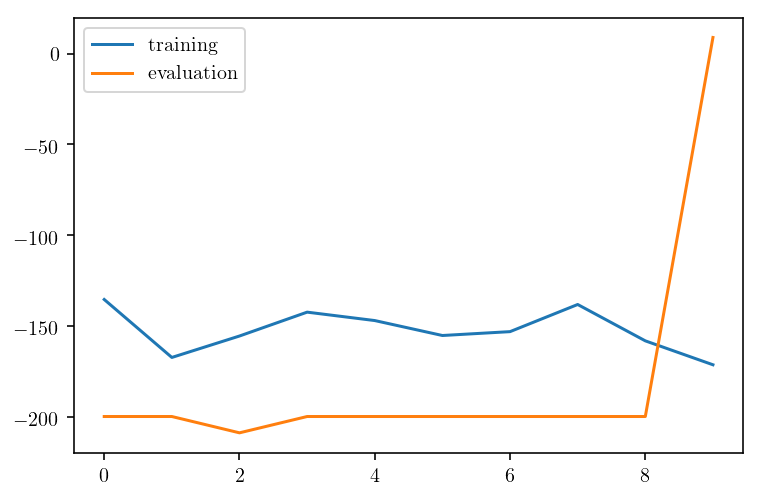

[-23.485743 -21.127117 -22.905577 -21.242788 -18.251347 -27.613888]
[ 0.04247233 -0.02175461  0.03732196 -0.01483867  0.01186847 -0.00021811]
[-3.3209631 -5.267123  -3.9893944 -3.2292016 -4.7207513 14.355425 ]


In [15]:
agent.commit()
returns_train = []
returns_eval = []
q_estimation = []

for _ in range(10):
    
    returns = environment.train(segments=10, episodes=100)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .9
    
    returns_train.append(np.mean(returns.T[0]))
    returns_eval.append(np.mean(returns.T[1]))
 
    q_estimation.append(environment.agent.q(environment.state_representation(479)))
    print(environment.agent.q(environment.state_representation(1)))
    print(environment.agent.q(environment.state_representation(200)))
    print(environment.agent.q(environment.state_representation(479)))
    
    environment.agent.save('../saved/taxi/mlp')

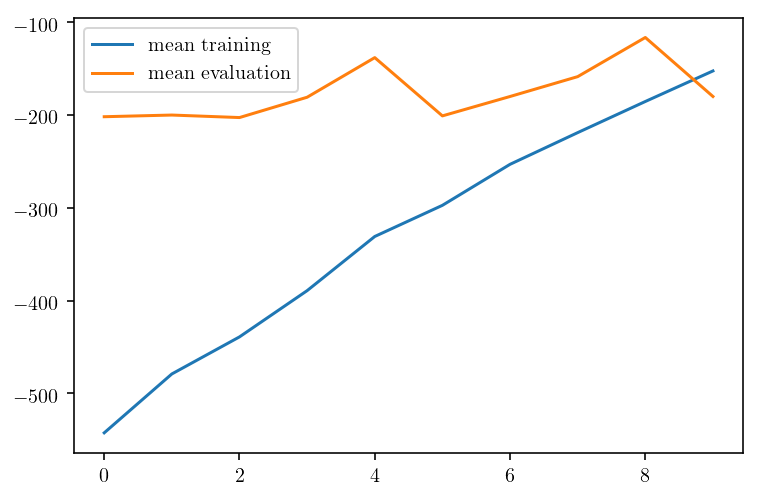

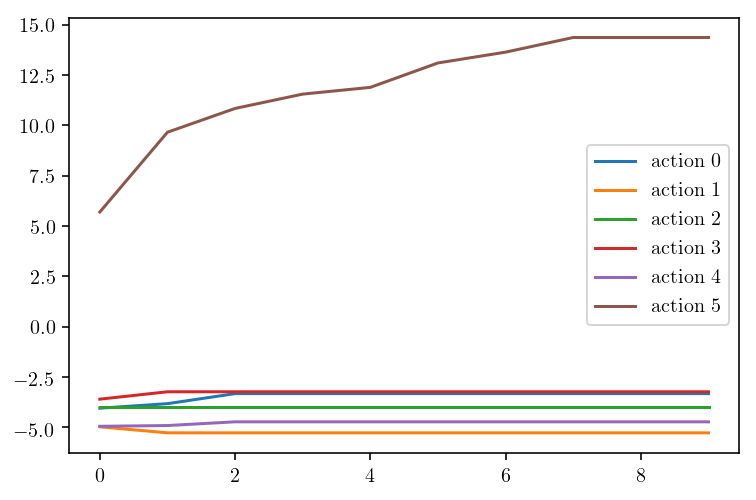

In [16]:
plt.figure()
plt.plot(returns_train, label='mean training')
plt.plot(returns_eval, label='mean evaluation')
plt.legend()
plt.show()

q_estimation = np.asarray(q_estimation)
plt.figure()
for i in range(environment.n_actions):
    plt.plot(q_estimation[:, i], label='action ' + str(i))
plt.legend()
plt.show()

## Testing

In [17]:
for _ in range(1):
    environment.exploration_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
269
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
269
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
169
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
149
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
169
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
189
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
89
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
69
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
49
+---------+
|R: | : :G|
| : : : : |
| :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
369
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
369
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
489
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
469
+---------+
|R: | :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
429
+---------+
|R: | : :G|

In [26]:
for _ in range(1):
    environment.evaluation_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+--

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: 

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: 

## Save

In [41]:
environment.agent.save('../saved/mixed_mlp')

In [28]:
environment.agent.terminal_state

0

In [39]:
s = np.zeros(501)
s[479]=1
environment.agent.q(s)

array([-7.6510696, -7.0044036, -8.631231 , -8.776291 , -7.7975073,
       -1.8874221], dtype=float32)